### INTEGER PROGRAMMING MODEL FOR A SOLAR PANEL MANUFACTURER SEEKING A COST EFFECTIVE DISTRIBUTION NETWORK 

In [17]:
#========================================
# libraries used in mode 
#========================================

import folium as fl # allows creating geogeografic maps
import random as rm # random numbers to create data
import pandas as pd # dataframes
from pulp import * # IP, LP or MIP optimization models

### MAP WITH AVAILABLE WAREHOUSES (ORIGIN NODES) IN THE NETWORK

In [18]:
#------------------------------------------------
# Folium map takes two arguments 
# * location: --> [latitude, longitude]
# * zoom
# * I obtained the location latitude and longitude
# from https://www.latlong.net/
#------------------------------------------------
map = fl.Map(location=[40.964863,-104.775263], zoom_start=5)
fl.Marker(location=[33.830302, -116.546843], popup="Palms Springs, CA", icon=fl.Icon(color='green')).add_to(map)
fl.Marker(location=[38.581573, -121.494400], popup="Sacramento, CA", icon=fl.Icon(color='green')).add_to(map)
fl.Marker(location=[29.759935, -95.364238], popup="Huston, TX",icon=fl.Icon(color='green')).add_to(map)
fl.Marker(location=[41.588821, -93.620308], popup="Des Moines, IO",icon=fl.Icon(color='green')).add_to(map)
fl.Marker(location=[33.748997, -84.387985], popup="Atlanta, GA",icon=fl.Icon(color='green')).add_to(map)
fl.Marker(location=[39.952583, -75.165222], popup="Philadelphia, PA",icon=fl.Icon(color='green')).add_to(map)
map



### CREATING LIST OF WAREHOUSES AND CUSTOMERS 


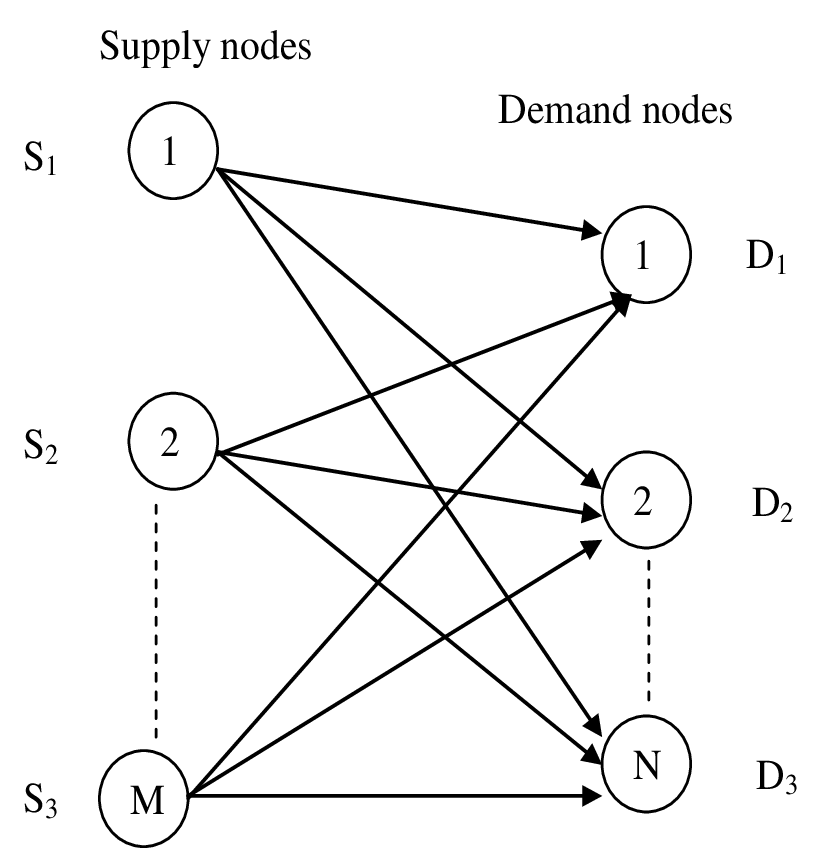

The supply chain network currently has 6 warehouses available to ship from. When modeling a transportation problem, we usually refer to these as the supply nodes. The supply nodes are supposed to serve 10 customers in the network. Customers are often referred to as the demand node. The arcs in the middle is what we aim to optimize.

In [19]:
#========================================================================
# creating a list of available warehouses in the network [SUPPLY NODE]
#========================================================================
warehouses = ['Palm Springs','Sacramento','Huston','Atlanta','Des Moines','Philadelpia']
#========================================================================
# creating a list of customers in the network [DEMAND NODE]
#========================================================================
customers = ['Chicago','St George','Gary','Madison','Buffalo','Tampa','New Orleans','Denver','Phoemix','New Milford']

The data utilized in this project is purely synthetic using random number methods from python 'random' library. 
* There are 10 Demand Nodes in the supply chain 
    * Assume that as a minimum customers can order 50,000 units of solar panels 
    * At maximum 300,000 units 
------------
10 random values in the range of 50,000 and 300,000 were generated to simulate customer demand. In order to assign these values to customers I created a dictionary that will take customers as key and demand as value.

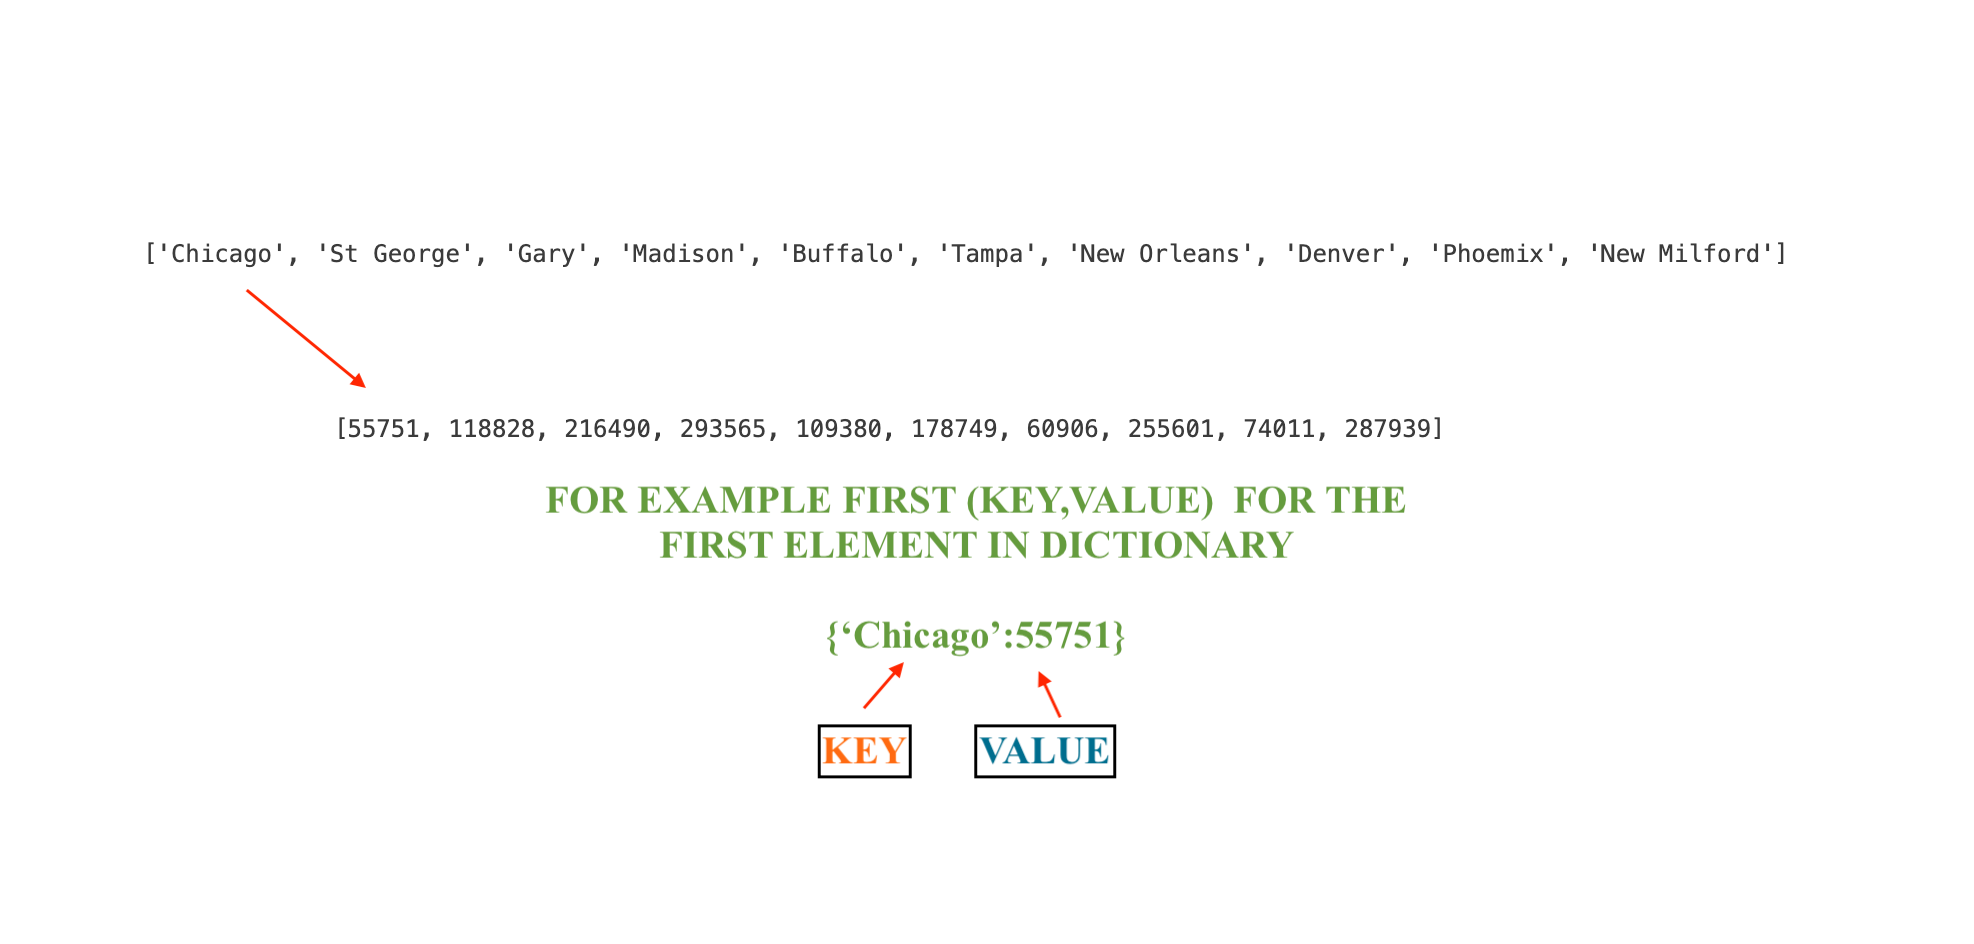

In [20]:
#=====================================================
# generating random numbers to simulate monthy demand
#=====================================================
n = 10 
demand = rm.sample(range(50000,300000), n)
customer_demand = dict(zip(customers, demand))

### BAR PLOT AND SUMMARY STATISTICS OF CUSTOMER DEMAND

<Axes: title={'center': 'Customer Demand'}, xlabel='Customer'>

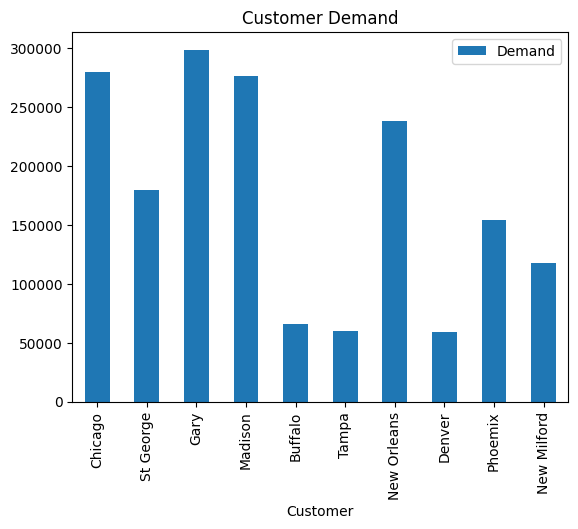

In [21]:
#================================================================================
# Creating a dataframe of customer demand for visualization and stats purposes 
#=================================================================================
customer_demand_dataframe = pd.DataFrame(list(customer_demand.items()), columns=['Customer', 'Demand'])
#================================================================================
# Creating a barplot
#=================================================================================
customer_demand_dataframe.plot(kind='bar', x='Customer', y='Demand', title='Customer Demand')

* SUMMARY 
    * By observing the bar plot customers with the higher demand appaar to be -->
        * Chicago
        * St George 
        * Denver 
        * New Mildford 
    * Customers with the lowest demand 
        * Tampa 
        * Gary 
        * Madison

* SUMMARY STATISTICS 
    * The average demand appears to be 133,156 units with a standard deviation of 61186 units 
    * The minimum demand amoung the 10 customers appears to be of 51521 units 
    * The maximum demand 216,539 units 

In [22]:
customer_demand_dataframe['Demand'].describe()

count        10.000000
mean     173057.900000
std       95941.519149
min       59497.000000
25%       78677.000000
50%      167088.500000
75%      266975.750000
max      298788.000000
Name: Demand, dtype: float64

In [23]:
n_p=60
shipping_prices = rm.choices(range(70,95), k=n_p)
key = [(w,c) for w in warehouses for c in customers]
cost_dict = dict(zip(key, shipping_prices))
cost_dict

{('Palm Springs', 'Chicago'): 94,
 ('Palm Springs', 'St George'): 78,
 ('Palm Springs', 'Gary'): 82,
 ('Palm Springs', 'Madison'): 75,
 ('Palm Springs', 'Buffalo'): 73,
 ('Palm Springs', 'Tampa'): 80,
 ('Palm Springs', 'New Orleans'): 84,
 ('Palm Springs', 'Denver'): 92,
 ('Palm Springs', 'Phoemix'): 71,
 ('Palm Springs', 'New Milford'): 77,
 ('Sacramento', 'Chicago'): 89,
 ('Sacramento', 'St George'): 71,
 ('Sacramento', 'Gary'): 79,
 ('Sacramento', 'Madison'): 92,
 ('Sacramento', 'Buffalo'): 93,
 ('Sacramento', 'Tampa'): 84,
 ('Sacramento', 'New Orleans'): 85,
 ('Sacramento', 'Denver'): 77,
 ('Sacramento', 'Phoemix'): 84,
 ('Sacramento', 'New Milford'): 83,
 ('Huston', 'Chicago'): 91,
 ('Huston', 'St George'): 88,
 ('Huston', 'Gary'): 72,
 ('Huston', 'Madison'): 92,
 ('Huston', 'Buffalo'): 80,
 ('Huston', 'Tampa'): 84,
 ('Huston', 'New Orleans'): 80,
 ('Huston', 'Denver'): 83,
 ('Huston', 'Phoemix'): 79,
 ('Huston', 'New Milford'): 76,
 ('Atlanta', 'Chicago'): 90,
 ('Atlanta', 'St Ge

In [24]:

# Initialize Model
model = LpProblem("Minimize Shipping Costs", LpMinimize)

/workspaces/supply_chain_optimization_models/.conda/lib/python3.12/site-packages/pulp/pulp.py:1489: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [25]:
# Define decision variables
key = [(w, c) for w in warehouses for c in customers]
var_dict = LpVariable.dicts('num_of_shipments', 
                            key, 
                            lowBound=0, cat='Integer')

In [26]:
model += lpSum([cost_dict[(w, c)] * var_dict[(w, c)] 
                for w in warehouses for c in customers])

In [27]:
for c in customers:
    model += lpSum([var_dict[(w,c)] for w in warehouses]) == customer_demand[c]

In [28]:
customer_demand

{'Chicago': 279846,
 'St George': 179685,
 'Gary': 298788,
 'Madison': 276489,
 'Buffalo': 65699,
 'Tampa': 60036,
 'New Orleans': 238436,
 'Denver': 59497,
 'Phoemix': 154492,
 'New Milford': 117611}

In [29]:
model.solve()

# Print the Model Status
print("Model Status: {}".format(LpStatus[model.status]))

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /workspaces/supply_chain_optimization_models/.conda/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/linux/i64/cbc /tmp/21c03ce5a77c4fa5a717586391ccf955-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/21c03ce5a77c4fa5a717586391ccf955-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 15 COLUMNS
At line 256 RHS
At line 267 BOUNDS
At line 328 ENDATA
Problem MODEL has 10 rows, 60 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 1.26655e+08 - 0.00 seconds
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cbc3007W No integer variables - nothing to do
Cuts at root node changed objective from 1.26655e+08 to -1.79769e+308
Probing was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cut

In [30]:
# Print the Decision Variables
for v in model.variables():
    print(v.name, "=", v.varValue)

num_of_shipments_('Atlanta',_'Buffalo') = 0.0
num_of_shipments_('Atlanta',_'Chicago') = 0.0
num_of_shipments_('Atlanta',_'Denver') = 59497.0
num_of_shipments_('Atlanta',_'Gary') = 0.0
num_of_shipments_('Atlanta',_'Madison') = 0.0
num_of_shipments_('Atlanta',_'New_Milford') = 0.0
num_of_shipments_('Atlanta',_'New_Orleans') = 0.0
num_of_shipments_('Atlanta',_'Phoemix') = 0.0
num_of_shipments_('Atlanta',_'St_George') = 0.0
num_of_shipments_('Atlanta',_'Tampa') = 0.0
num_of_shipments_('Des_Moines',_'Buffalo') = 0.0
num_of_shipments_('Des_Moines',_'Chicago') = 279846.0
num_of_shipments_('Des_Moines',_'Denver') = 0.0
num_of_shipments_('Des_Moines',_'Gary') = 0.0
num_of_shipments_('Des_Moines',_'Madison') = 0.0
num_of_shipments_('Des_Moines',_'New_Milford') = 0.0
num_of_shipments_('Des_Moines',_'New_Orleans') = 0.0
num_of_shipments_('Des_Moines',_'Phoemix') = 0.0
num_of_shipments_('Des_Moines',_'St_George') = 0.0
num_of_shipments_('Des_Moines',_'Tampa') = 0.0
num_of_shipments_('Huston',_'Buff

In [31]:
# Print the Objective Value
print("Objective = ", value(model.objective))

Objective =  126655251.0


- shadow price
    - represents changes in total cost associated with a unit increase in demand in a given region
- slack
    - should be = 0

In [32]:
# Print the Constraint Slack
o = [{'name':name, 'shadow price':c.pi,'slack':c.slack} 
     for name, c in model.constraints.items()]
o_df = pd.DataFrame(o)
o_df

,name,shadow price,slack
0,_C1,0.0,-0.0
1,_C2,0.0,-0.0
2,_C3,0.0,-0.0
3,_C4,0.0,-0.0
4,_C5,0.0,-0.0
5,_C6,0.0,-0.0
6,_C7,0.0,-0.0
7,_C8,0.0,-0.0
8,_C9,0.0,-0.0
9,_C10,0.0,-0.0
